In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


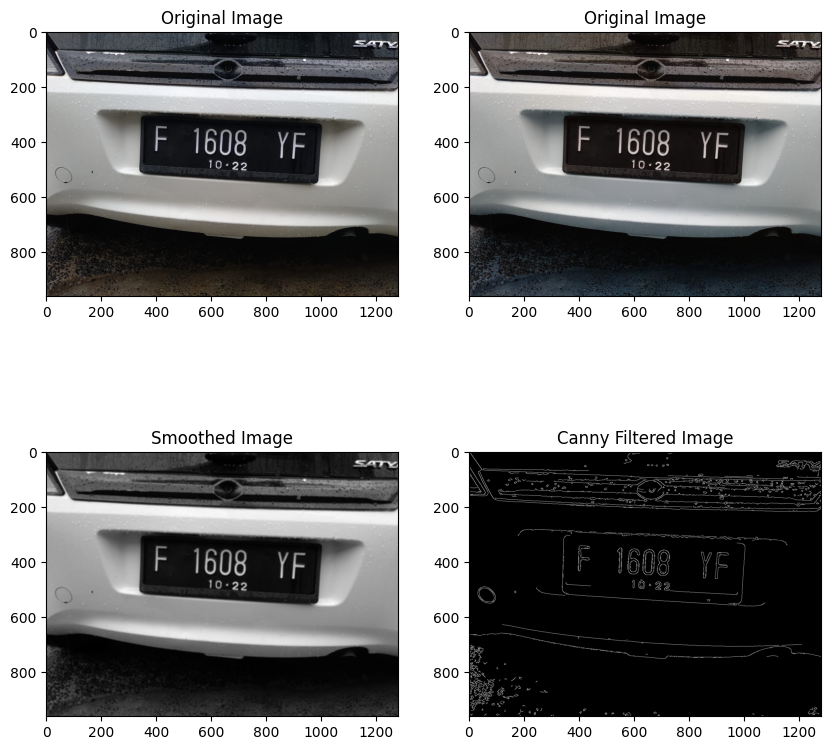

In [7]:
# Load image
img = cv2.imread('Indo_Lic.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply low pass filter
kernel = np.ones((5, 5), np.float32)/25
smoothed = cv2.filter2D(gray, -1, kernel)


# Display original and filtered images side by side
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Original Image')
axs[1][0].imshow(smoothed, cmap='gray')
axs[1][0].set_title('Smoothed Image')
# Apply Canny filter
edges = cv2.Canny(smoothed, 50, 100)

axs[0][1].imshow(img, cmap="gray")
axs[0][1].set_title("Original Image")
axs[1][1].imshow(edges, cmap="gray")
axs[1][1].set_title("Canny Filtered Image")
plt.show()

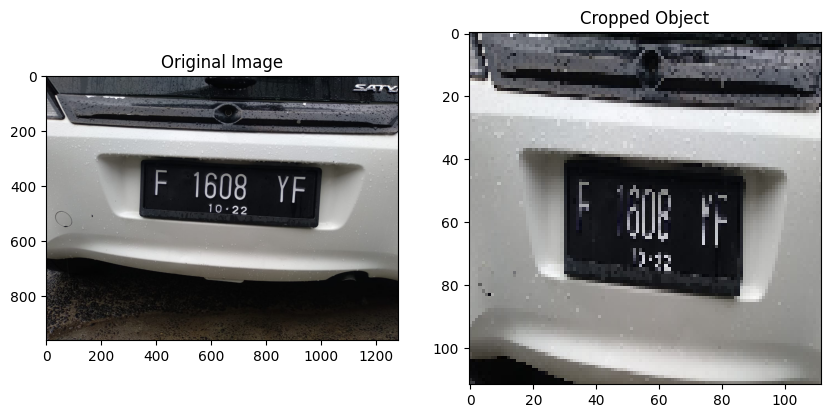

In [8]:
# Load image
img = cv2.imread("Indo_Lic.jpeg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour (assuming it's the object)
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image to the bounding box and resize to 224x224
cropped = cv2.resize(img[y : y + h, x : x + w], (112, 112))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
axs[1].set_title('Cropped Object')
plt.show()


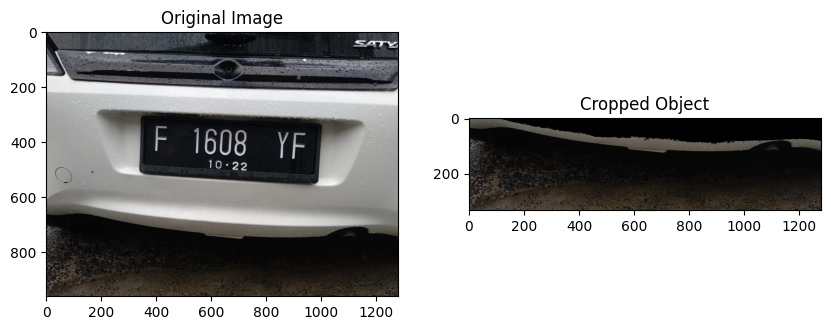

In [9]:
# Load image
img = cv2.imread('Indo_Lic.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour
cnt = max(contours, key=cv2.contourArea)

# Create a mask image for the contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [cnt], 0, 255, -1)

# Apply the mask to the original image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Crop the object from the masked image
x, y, w, h = cv2.boundingRect(cnt)
crop_img = masked_img[y:y+h, x:x+w]

# Display the original image and the cropped object
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Cropped Object')
plt.show()




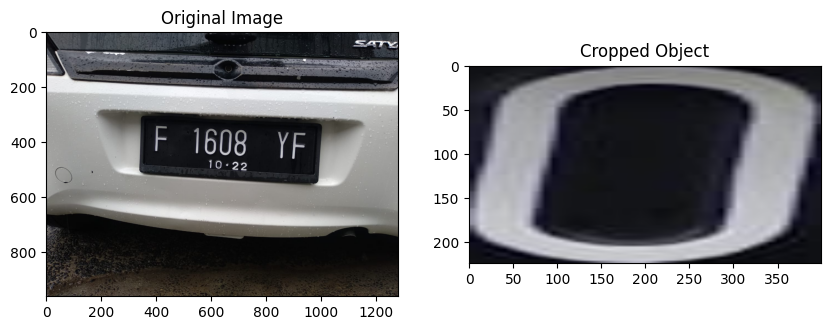

In [16]:
# Code untuk melakukan deteksi objek
import cv2
import numpy as np

# Load image
img = cv2.imread('Indo_Lic.jpeg')

# Apply Gaussian blur to smooth the image
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Canny edge detection to find edges
edges = cv2.Canny(blurred, 100, 200)

# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour (assuming it's the object)
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image to the bounding box and resize to 224x224
cropped = cv2.resize(img[y:y+h, x:x+w], (400, 224))

# Display original and cropped images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
axs[1].set_title('Cropped Object')
plt.show()